# Halo catalogs with splashback

This notebooks shows how to use the `Catalog` object to inspect the properties of halos with splashback radii.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Formatting
plt.rc("text", usetex=True)
plt.rc("font", size=24, family="serif")

In [3]:
#This has the Catalog object
from catalog import *

In [4]:
#Select a simulation
length       = 2000 #Mpc/h comoving
scale_factor = 1.

In [5]:
#Create the Catalog object
cat = Catalog(length, scale_factor)

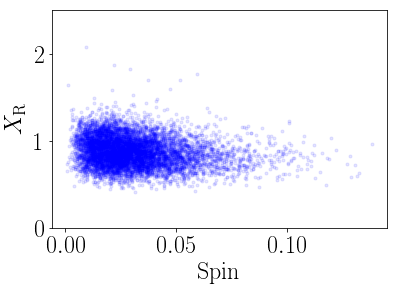

In [6]:
#Make a scatter plot of X_M_mean vs. c200b
plt.plot(cat.property("Spin"), cat.property("X_Rsp_mean"), "b.", alpha=0.1)
#plt.xlabel(r"$c_{\rm 200b}$")
plt.xlabel(r"Spin")
plt.ylabel(r"$X_{\rm R}$")
#plt.xlim(0,20)
plt.ylim(0, 2.5)
plt.savefig("spin_vs_Xr.png", dpi=300, bbox_inches="tight")

In [7]:
print np.corrcoef(cat.property("X_Rsp_mean"), cat.property("Spin"))

[[ 1.         -0.18091117]
 [-0.18091117  1.        ]]


In [8]:
names, corrs = cat.compute_correlations("R", "mean")

In [9]:
#Print the top 50 correlated variables
count = 0
for name, R in zip(names, corrs):
    if count >=50: 
        break
    else:
        print("%20s %.4f"%(name, R))
    count += 1

            Rsp_mean 0.8541
          X_Msp_mean 0.8234
      Halfmass_Scale -0.6824
     Acc_Rate_2*Tdyn -0.4649
      Acc_Rate_Mpeak -0.4458
               T/|U| -0.3702
    scale_of_last_MM -0.3598
                Xoff -0.3049
           nusp_mean 0.2850
     Acc_Rate_1*Tdyn -0.2490
                Voff -0.2360
     Halfmass_Radius -0.2323
            Msp_mean 0.2319
           Rs_Klypin -0.2244
                  rs -0.2001
                Spin -0.1929
              c_to_a 0.1908
        Spin_Bullock -0.1894
               c200b 0.1830
        Msp_mean_err -0.1672
        Rsp_mean_err 0.1599
         c_to_a_500c 0.1590
Log_[Vmax/Vmax_max[Tdyn;Tmpeak]] -0.1232
      X_Msp_mean_err -0.1189
     Acc_Rate_100Myr -0.0972
       Acc_Rate_Inst -0.0972
              b_to_a 0.0968
               Vpeak 0.0909
         b_to_a_500c 0.0873
         Mpeak_Scale -0.0695
                vrms -0.0625
              nu200b -0.0565
                Vacc 0.0543
                vmax 0.0514
               

In [10]:
MIC_names, MICs = cat.compute_MICs("R", "mean")

In [11]:
#Print the top 50 MIC scores
count = 0
for name, MIC in zip(MIC_names, MICs):
    if count >=50: 
        break
    else:
        print("%20s %.4f"%(name, MIC))
    count += 1

            Rsp_mean 0.6149
          X_Msp_mean 0.5815
      Halfmass_Scale 0.4662
      Acc_Rate_Mpeak 0.2814
     Acc_Rate_2*Tdyn 0.2648
    scale_of_last_MM 0.1995
           nusp_mean 0.1602
            Msp_mean 0.1602
               T/|U| 0.1467
                Xoff 0.1282
Log_[Vmax/Vmax_max[Tdyn;Tmpeak]] 0.1201
               c200b 0.1170
                  rs 0.1131
           Rs_Klypin 0.1130
      X_Msp_mean_err 0.1083
        Msp_mean_err 0.1048
     Acc_Rate_1*Tdyn 0.1009
                Voff 0.1008
     Halfmass_Radius 0.0983
              c_to_a 0.0931
         c_to_a_500c 0.0920
        Spin_Bullock 0.0884
        Rsp_mean_err 0.0863
                A[z] 0.0857
                Spin 0.0823
                A[x] 0.0821
                A[y] 0.0820
         b_to_a_500c 0.0814
               Vpeak 0.0787
              b_to_a 0.0779
                Vacc 0.0744
                vmax 0.0743
                vrms 0.0737
       Acc_Rate_Inst 0.0706
     Acc_Rate_100Myr 0.0706
        

In [12]:
#Print out the top 50 MIC scores and their associated correlations
count = 0
for name, MIC in zip(MIC_names, MICs):
    ind = np.where(names == name)
    R = corrs[ind]
    if count >=50: 
        break
    else:
        print("%20s \tR = %.4f\tMIC = %.4f"%(name[:20], R, MIC))
    count += 1

            Rsp_mean 	R = 0.8541	MIC = 0.6149
          X_Msp_mean 	R = 0.8234	MIC = 0.5815
      Halfmass_Scale 	R = -0.6824	MIC = 0.4662
      Acc_Rate_Mpeak 	R = -0.4458	MIC = 0.2814
     Acc_Rate_2*Tdyn 	R = -0.4649	MIC = 0.2648
    scale_of_last_MM 	R = -0.3598	MIC = 0.1995
           nusp_mean 	R = 0.2850	MIC = 0.1602
            Msp_mean 	R = 0.2319	MIC = 0.1602
               T/|U| 	R = -0.3702	MIC = 0.1467
                Xoff 	R = -0.3049	MIC = 0.1282
Log_[Vmax/Vmax_max[T 	R = -0.1232	MIC = 0.1201
               c200b 	R = 0.1830	MIC = 0.1170
                  rs 	R = -0.2001	MIC = 0.1131
           Rs_Klypin 	R = -0.2244	MIC = 0.1130
      X_Msp_mean_err 	R = -0.1189	MIC = 0.1083
        Msp_mean_err 	R = -0.1672	MIC = 0.1048
     Acc_Rate_1*Tdyn 	R = -0.2490	MIC = 0.1009
                Voff 	R = -0.2360	MIC = 0.1008
     Halfmass_Radius 	R = -0.2323	MIC = 0.0983
              c_to_a 	R = 0.1908	MIC = 0.0931
         c_to_a_500c 	R = 0.1590	MIC = 0.0920
        Spin_Bullock

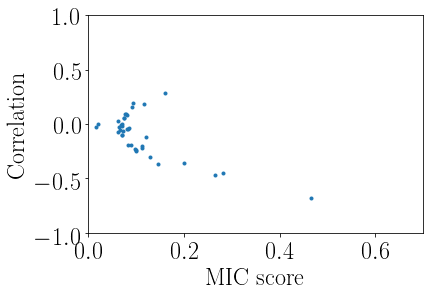

In [13]:
Rs_MIC_ordered = np.zeros_like(MICs)-100
i = 0
for name, MIC in zip(MIC_names, MICs):
    if any(x in name for x in ["Rsp","Msp"]):
        i+=1
        continue
    ind = np.where(names == name)
    Rs_MIC_ordered[i] = corrs[ind]
    i+=1
plt.scatter(MICs, Rs_MIC_ordered, marker='.')
plt.xlim(0,0.7)
plt.ylim(-1,1)
plt.xlabel(r"MIC score")
plt.ylabel(r"Correlation")
plt.savefig("MIC_and_corr.png", dpi=300, bbox_inches="tight")

In [14]:
#Let's make a plot! Let's do a scatter plot of interesting properties
interesting_properties1 = ["X_Rsp_mean", "nusp_mean", "Acc_Rate_2*Tdyn"]
interesting_properties2 = ["X_Rsp_mean", "c200b", "Spin", "c_to_a"]
data1 = []
data2 = []
for i in interesting_properties1:
    dat = cat.property(i)
    if "Acc_Rate" in i:
        dat = np.log(np.fabs(dat))
    data1.append(dat)
data1 = np.array(data1)
for i in interesting_properties2:
    dat = cat.property(i)
    data2.append(dat)
data2 = np.array(data2)
print(data1.shape, data2.shape)

((3, 7950), (4, 7950))


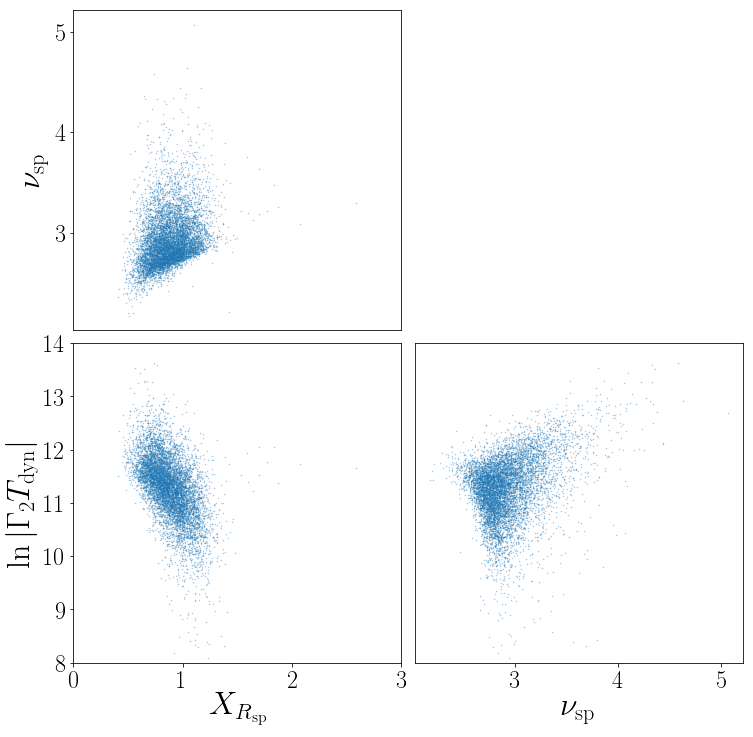

In [18]:
l = len(interesting_properties1)
fig, axes = plt.subplots(nrows=l-1, ncols=l-1, figsize=(12,12))
plt.subplots_adjust(hspace=0.04, wspace=0.04)
for i in range(0, l-2):
    for j in range(i+1, l-1):
        fig.delaxes(axes[i][j])
#labels = [r"$X_{M_{\rm sp};{\rm mean}}$", r"$X_{R_{\rm sp};{\rm mean}}$", r"$c_{\rm 200b}$", r"${\rm Spin}$", r"$c:a$",
#          r"$\ln|\Gamma_1T_{\rm dyn}|$", r"$\ln|\Gamma_2T_{\rm dyn}|$"]
labels = [r"$X_{R_{\rm sp}}$", r"$\nu_{\rm sp}$", r"$\ln|\Gamma_2T_{\rm dyn}|$"]

for i in range(0, l-1):
    for j in range(0, i+1):
        axes[i][j].scatter(data1[j], data1[i+1], marker='.', s=1, alpha=0.4)
        if j==0:
            axes[i][j].set_ylabel(labels[i+1], fontsize=32)
            axes[i][j].set_xlim(0, 3)
        if i < l-2:
            axes[i][j].set_xticks([])
            axes[i][j].set_xticklabels([])
        if i == l-2:
            axes[i][j].set_xlabel(labels[j], fontsize=32)
        if j > 0:
            axes[i][j].set_yticks([])
            axes[i][j].set_yticklabels([])
axes[1][0].set_ylim(8,14)
axes[1][1].set_ylim(8,14)
fig.savefig("scatter_old_props.png", dpi=300,bbox_inches="tight")

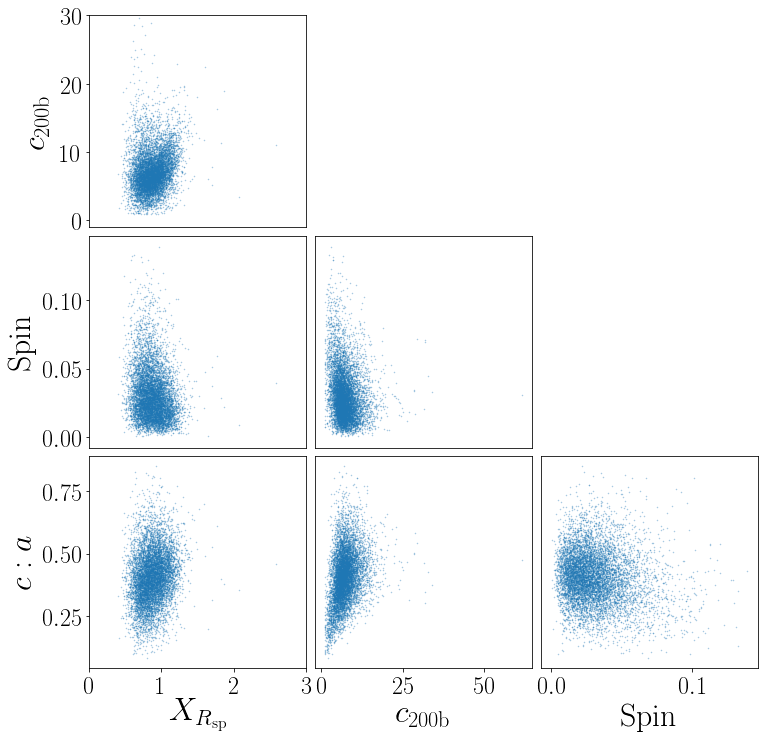

In [20]:
l = len(interesting_properties2)
fig, axes = plt.subplots(nrows=l-1, ncols=l-1, figsize=(12,12))
plt.subplots_adjust(hspace=0.04, wspace=0.04)
for i in range(0, l-2):
    for j in range(i+1, l-1):
        fig.delaxes(axes[i][j])
#labels = [r"$X_{M_{\rm sp};{\rm mean}}$", r"$X_{R_{\rm sp};{\rm mean}}$", r"$c_{\rm 200b}$", r"${\rm Spin}$", r"$c:a$",
#          r"$\ln|\Gamma_1T_{\rm dyn}|$", r"$\ln|\Gamma_2T_{\rm dyn}|$"]
labels = [r"$X_{R_{\rm sp}}$", r"$c_{\rm 200b}$", r"${\rm Spin}$", r"$c:a$"]
for i in range(0, l-1):
    for j in range(0, i+1):
        axes[i][j].scatter(data2[j], data2[i+1], marker='.', s=1, alpha=0.4)
        if j==0:
            axes[i][j].set_ylabel(labels[i+1], fontsize=32)
            axes[i][j].set_xlim(0, 3)
        if i < l-2:
            axes[i][j].set_xticks([])
            axes[i][j].set_xticklabels([])
        if i == l-2:
            axes[i][j].set_xlabel(labels[j], fontsize=32)
        if j > 0:
            axes[i][j].set_yticks([])
            axes[i][j].set_yticklabels([])
axes[0][0].set_ylim(-1,30)
fig.savefig("scatter_new_props.png", dpi=300,bbox_inches="tight")